In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
# Crear un DataFrame con los puntos dados
data = {
    'X': [24, 150, 85, 5, 75],
    'Y': [1.23, 2.00, 1.65, 0.50, 1.85]
}

df = pd.DataFrame(data)

# Mostrar las primeras 5 filas del DataFrame
print(df.head())


     X     Y
0   24  1.23
1  150  2.00
2   85  1.65
3    5  0.50
4   75  1.85


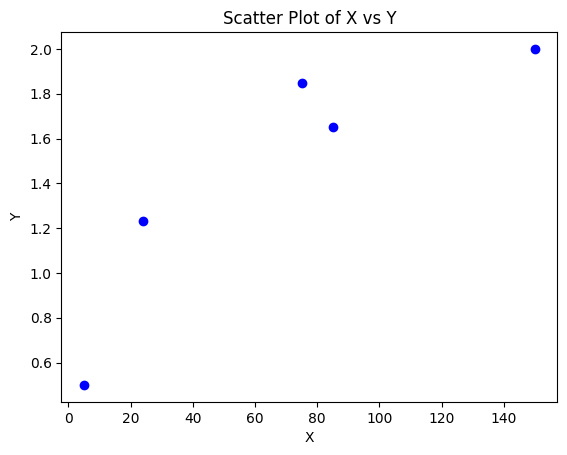

In [5]:
# Visualizar los datos
plt.scatter(df['X'], df['Y'], color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X vs Y')
plt.show()


### 📌 Formato de entrada en Scikit-Learn: `X` y `y`

En Scikit-Learn, cuando seleccionas variables independientes (features) para el modelo, necesitas que **`X` sea un array bidimensional (2D)**, incluso si tienes solo una característica. Esto se hace así porque:

- `X` representa las **características de entrada**, y puede tener una o varias columnas.
- Aunque solo haya una columna, Scikit-Learn espera que esté en **formato 2D**, es decir, como una **matriz de forma (n_muestras, n_features)**.
- `y` representa la **variable de salida** (target), y debe ser un array **unidimensional (1D)** de forma `(n_muestras,)`.

**Ejemplo de diferencia:**

```python
# Incorrecto: esto es un array 1D (una Serie de pandas)
X = df['X']

# Correcto: esto es un array 2D (un DataFrame con una columna)
X = df[['X']]
```

---

### 🔧 Entrenamiento del modelo

```python
lin_reg.fit(X, y)
```

**Objetivo:** Esta línea entrena el modelo de regresión lineal usando los datos de entrada `X` y los valores de salida `y`.

**Detalles:**

- `X`: Matriz 2D que contiene las **variables independientes** (input features).
- `y`: Array 1D con la **variable dependiente** (target).

El método `.fit()` calcula los **coeficientes** (pendiente e intercepto) de la línea recta que mejor se ajusta a los datos.


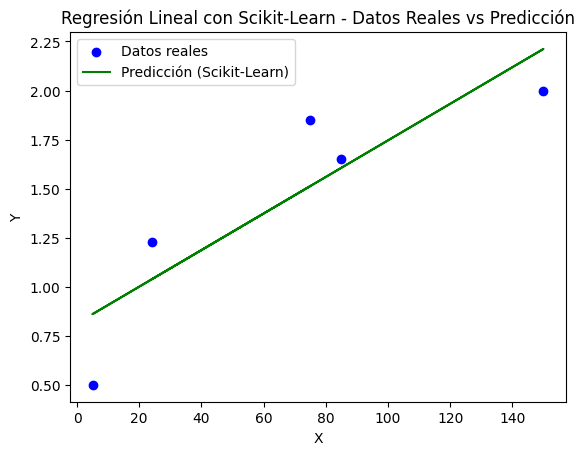

In [4]:
# Usar Scikit-Learn para validar el modelo
X = df[['X']].values
y = df['Y'].values # por tiene dos corchetes

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_sklearn = lin_reg.predict(X)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)


# Visualizar los resultados
plt.scatter(df['X'], df['Y'], color='blue', label='Datos reales')
plt.plot(df['X'], y_pred_sklearn, color='green', label='Predicción (Scikit-Learn)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión Lineal con Scikit-Learn - Datos Reales vs Predicción')
plt.legend()
plt.show()


### 📈 Acceso a los coeficientes del modelo: `lin_reg.coef_`

Después de entrenar un modelo de regresión lineal con:

```python
lin_reg.fit(X, y)
```

puedes acceder a los **coeficientes** del modelo usando el atributo `.coef_`.

---

### 🔹 ¿Qué es `lin_reg.coef_`?

- Es un **array** que contiene los coeficientes (pendientes) correspondientes a cada una de las variables independientes (`X`) utilizadas en el modelo.
- En una **regresión lineal simple** (con una sola característica), `lin_reg.coef_` será un array de un solo valor.

```python
print(lin_reg.coef_)
```

Ejemplo de salida:
```
[3.75]
```

---

### 🔹 ¿Qué significa `lin_reg.coef_[0]`?

- El índice `[0]` selecciona el **primer (y único)** coeficiente del array.
- En regresión lineal simple, este valor representa la **pendiente de la recta** que mejor ajusta los datos.

> 📌


In [6]:
# prompt: ecuacion de la recta

# Obtener la pendiente (m) y la intersección (b) de la recta ajustada
m = lin_reg.coef_[0]
b = lin_reg.intercept_

# Imprimir la ecuación de la recta
print(f"Ecuación de la recta: Y = {m:.4f}X + {b:.4f}")


Ecuación de la recta: Y = 0.0093X + 0.8142


In [7]:
# prompt: reemplazar cuando x=35

import numpy as np
# Predecir el valor de Y cuando X = 35
nuevo_x = np.array([[35]])
prediccion = lin_reg.predict(nuevo_x)

print(f"Predicción para X = 35: Y = {prediccion[0]:.4f}")


Predicción para X = 35: Y = 1.1404


In [8]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Suponiendo que ya tienes calculado y_pred_sklearn y y

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y, y_pred_sklearn)
print(f"MAE: {mae}")

# Calcular el Coeficiente de Determinación (R²)
r2 = r2_score(y, y_pred_sklearn)
print(f"R²: {r2}")

# Calcular el Error Cuadrático Medio (MSE)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
print(f"MSE: {mse_sklearn}")

# Calcular la Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse_sklearn)
print(f"RMSE: {rmse}")



MAE: 0.22910849245766104
R²: 0.7746878308004694
MSE: 0.06549013634821237
RMSE: 0.2559104068775093


### 📊 Evaluación del Modelo de Regresión

Una vez entrenado el modelo, es importante evaluar su rendimiento utilizando distintas métricas. A continuación se explican las más comunes:

---

### 🔹 MAE (Error Absoluto Medio)

```python
MAE = 0.2291
```

- El MAE indica que, en promedio, las predicciones del modelo se desvían **0.2291 unidades** de los valores reales.
- Esta métrica **usa la misma escala** que la variable dependiente.
- **Cuanto menor sea el MAE, mejor** es el rendimiento del modelo en términos de precisión.

---

### 🔹 R² (Coeficiente de Determinación)

```python
R² = 0.7747
```

- Indica que aproximadamente el **77.47% de la variabilidad** en la variable dependiente es explicada por las variables independientes.
- Un valor de **R² cercano a 1** sugiere un mejor ajuste del modelo.
- En este caso, el modelo **explica bien los datos**, aunque aún queda un **22.53% de variabilidad no explicada**.

---

### 🔹 MSE (Error Cuadrático Medio)

```python
MSE = 0.0655
```

- Representa el **promedio del error al cuadrado** entre las predicciones y los valores reales.
- Debido a que los errores están al cuadrado, penaliza más los errores grandes.
- No es directamente interpretable en unidades de la variable dependiente.
- **Un valor más bajo indica mayor precisión** del modelo.

---

### 🔹 RMSE (Raíz del Error Cuadrático Medio)

```python
RMSE = 0.2559
```

- Es la **raíz cuadrada del MSE**.
- A diferencia del MSE, el RMSE **está en la misma escala** que la variable de salida.
- **Fácil de interpretar**: en promedio, las predicciones están a **0.2559 unidades del valor real**.
- Al igual que el MAE, **un valor más bajo sugiere un mejor rendimiento**.

---

✅ Estas métricas te permiten comparar diferentes modelos y seleccionar el que mejor se ajuste a tus datos.
